<a href="https://colab.research.google.com/github/LuisMirandaMallqui/Inteligencia_Artificial_TareaAcademica_Grupo8_H783/blob/main/Trabajo_Grupo8_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# ==============================================================================
# LIBRERÍAS
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Métricas
from sklearn.metrics import mean_squared_error, r2_score

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Configuración
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

# **CARGA DE DATOS**

In [39]:
#Cargar el archivo y analizar filas dañadas
#Acá por el momento leo el num_embar como str para luego en la fase de limpieza convertirla solucionando los incovenientes con valores anomalos
df_nacimientos = pd.read_csv('CNV_MINSA_4782338_CORTE_310825.csv', delimiter=';', on_bad_lines='warn',dtype={'Num_embar_madre': str})
df_ubigeos = pd.read_csv('Lista_Ubigeos_INEI.csv', delimiter=';')
# Diccionario de renombrado de columnas
df_nacimientos.rename(columns={
    'FecNac_Año': 'Año_Nacimiento',
    'FecNac_Mes': 'Mes_Nacimiento',
    'PESO_NACIDO': 'Peso_Nacido',
    'TALLA_NACIDO': 'Talla_Nacido',
    'DUR_EMB_PARTO': 'Duracion_Embarazo',
    'Condicion_Parto': 'Condicion_Parto',
    'sexo_nacido': 'Sexo_Nacido',
    'Tipo_Parto': 'Tipo_Parto',
    'Edad_Madre': 'Edad_Madre',
    'Estado_Civil': 'Estado_Civil_Madre',
    'Nivel_Intrucción_Madre': 'Nivel_Instruccion_Madre',
    'DESC_OCUPACION': 'Ocupacion_Madre',
    'Num_embar_madre': 'Numero_Embarazos_Madre',
    'Hijos_vivo_madre': 'Hijos_Vivos_Madre',
    'Hijos_fallec_madre': 'Hijos_Fallecidos_Madre',
    'nacmuer_abort_madre': 'Abortos_Madre',
    'Pais_Madre': 'Pais_Madre',
    'IdUbigeoInei': 'Codigo_Ubigeo',
    'Ipress': 'Ipress_Hospital',
    'Lugar_Nacido': 'Lugar_Nacimiento',
    'Atiende_Parto': 'Atiende_Parto',
    'Financiador_Parto': 'Financiador_Parto'
}, inplace=True)


/tmp/ipython-input-2270106217.py:3: ParserWarning: Skipping line 4410: expected 22 fields, saw 23
Skipping line 24028: expected 22 fields, saw 23
Skipping line 30508: expected 22 fields, saw 23

  df_nacimientos = pd.read_csv('CNV_MINSA_4782338_CORTE_310825.csv', delimiter=';', on_bad_lines='warn',dtype={'Num_embar_madre': str})
/tmp/ipython-input-2270106217.py:3: ParserWarning: Skipping line 59866: expected 22 fields, saw 23
Skipping line 61121: expected 22 fields, saw 23

  df_nacimientos = pd.read_csv('CNV_MINSA_4782338_CORTE_310825.csv', delimiter=';', on_bad_lines='warn',dtype={'Num_embar_madre': str})
/tmp/ipython-input-2270106217.py:3: ParserWarning: Skipping line 71027: expected 22 fields, saw 23
Skipping line 77936: expected 22 fields, saw 23
Skipping line 83729: expected 22 fields, saw 23
Skipping line 85126: expected 22 fields, saw 23

  df_nacimientos = pd.read_csv('CNV_MINSA_4782338_CORTE_310825.csv', delimiter=';', on_bad_lines='warn',dtype={'Num_embar_madre': str})
/tmp/

In [ ]:
# En total tenemos 134 filas dañadas
# DtypeWarning sugiere que la columna 14 tiene tipos de datos mixtos (por ejemplo, números y texto en la misma columna), esto puede ocasionar problemas al analizar los datos.
# La solución es especificar un tipo de dato para al cargar el archivo, en este caso tome string porque el valor extraño es >=5. Aplicamos el parametro dtype={'Num_embar_madre': str} al momento de cargar el archivo

## Revisión de datos

In [40]:
# Información del data frame
df_nacimientos.head()
df_nacimientos.dtypes

,0
Año_Nacimiento,int64
Mes_Nacimiento,int64
Peso_Nacido,int64
Talla_Nacido,float64
Duracion_Embarazo,int64
Condicion_Parto,object
Sexo_Nacido,object
Tipo_Parto,object
Edad_Madre,int64
Estado_Civil_Madre,object


\nPorcentaje de nulos por columna (%):
Año_Nacimiento             0.0
Mes_Nacimiento             0.0
Peso_Nacido                0.0
Talla_Nacido               0.0
Duracion_Embarazo          0.0
Condicion_Parto            0.0
Sexo_Nacido                0.0
Tipo_Parto                 0.0
Edad_Madre                 0.0
Estado_Civil_Madre         0.0
Nivel_Instruccion_Madre    0.0
Ocupacion_Madre            0.0
Numero_Embarazos_Madre     0.0
Hijos_Vivos_Madre          0.0
Hijos_Fallecidos_Madre     0.0
Abortos_Madre              0.0
Pais_Madre                 0.0
Codigo_Ubigeo              0.0
Ipress_Hospital            0.0
Lugar_Nacimiento           0.0
Atiende_Parto              0.0
Financiador_Parto          0.0
dtype: float64


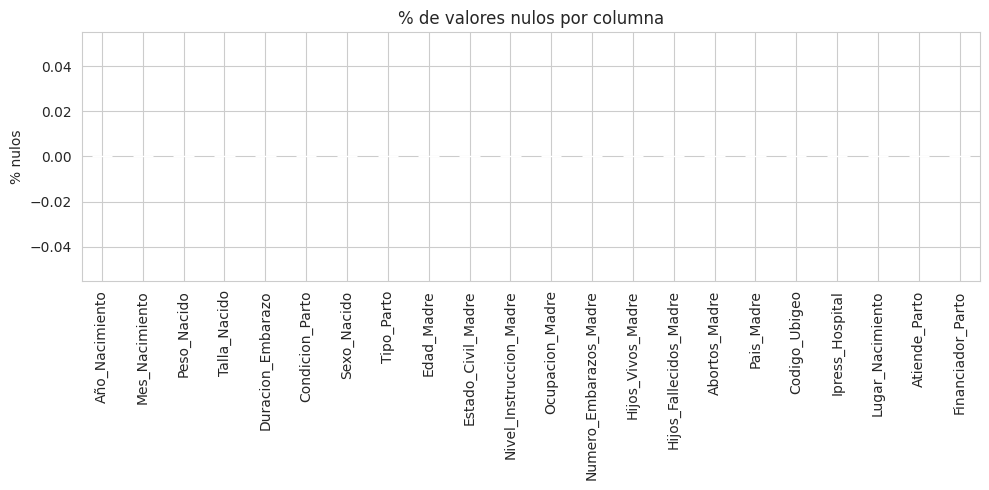

In [41]:
#Revisión de los datos:
# Verificar valores nulos
# Porcentaje de nulos
null_pct = (df_nacimientos.isna().sum() / len(df_nacimientos)).sort_values(ascending=False) * 100
print("\\nPorcentaje de nulos por columna (%):")
print(null_pct)
#No se presentan valores nulos, lo ejecute por separado y todos salian 0 en la tabla, pero al ejecutar estos comandos en secuencia solo aparece el resultado del último por alguna razón
# --- Gráfico 1: barras de % de nulos ---
plt.figure(figsize=(10, 5))
null_pct.plot(kind='bar')
plt.title('% de valores nulos por columna')
plt.ylabel('% nulos')
plt.tight_layout()
plt.show()

# Verificar duplicados
#df.duplicated().sum()
#Presenta 953 datos

In [ ]:

#Primero: eliminar duplicados para evitar que el modelo se entrene con datos redundantes.
#df.drop_duplicates(inplace=True)
#df.duplicated().sum()
#Analizando las columnas me parece que no hay problema con los repetidos, es normal pues no tratamos con datos especificos de las personas


# **LIMPIEZA DE DATOS**

## **Transformación de variables**




Asegurar que los datos estén en el formato correcto para el análisis y que no haya inconsistencias. Se realizan las modificaciones necesarias para que las columnas sean coherentes con el análisis.

#### **Pasos**:




* **Convertir variables categóricas en numéricas** (si es necesario):
* **Convertir columnas de fecha a tipo datetime**
* **Normalizar o estandarizar columnas numéricas**:
   Ante columnas con diferentes escalas (por ejemplo, edad de la madre y peso del bebé), es útil normalizarlas o estandarizarlas para que estén en la misma escala y el modelo no se vea influenciado por la magnitud de los valores.

   Ejemplo de **Estandarización**:

   ```python
   from sklearn.preprocessing import StandardScaler

   # Normalizar la columna Edad_Madre
   scaler = StandardScaler()
   df[['Edad_Madre']] = scaler.fit_transform(df[['Edad_Madre']])
   ```

* **Lidiar con valores nulos**
* **Lidiar con Outliers**

### **Importancia**

* **Transformación de variables**: Variables con formato adecuado para el análisis.
* **Escalado y normalización**: Algunos modelos (como KNN o redes neuronales) son sensibles a la escala de los datos, por lo que es necesario normalizar o estandarizar las columnas numéricas.
* **Limpieza de valores nulos**: Los valores faltantes pueden sesgar los resultados si no se manejan correctamente. En nuestro caso no se presentaron valores nulos de primeras.

---




## Corrección de Tipos de Datos

### Columnas 1 y 2:  Año_Nacimiento y Mes_Nacimiento

In [42]:
# 1. Crea un diccionario mapeando los nombres de tus columnas a los nombres que pd.to_datetime espera ('year', 'month', 'day').
date_components = {
    'year': df_nacimientos['Año_Nacimiento'],
    'month': df_nacimientos['Mes_Nacimiento'],
    'day': 1  # Asignamos el día 1 a todos, es por cuestión de que la función lo requiere. Se permite esto pues no afecta al analisis
}

# 2. Pasa este diccionario a pd.to_datetime
df_nacimientos['Fecha_Nacimiento'] = pd.to_datetime(date_components)

# 3. Ahora puedes eliminar las columnas originales
df_nacimientos.drop(columns=['Año_Nacimiento', 'Mes_Nacimiento'], inplace=True)

# 4. Verificar las primeras filas y el tipo de dato
print(df_nacimientos.head())
print(f"Tipo de dato de la nueva columna: {df_nacimientos['Fecha_Nacimiento'].dtype}")

   Peso_Nacido  Talla_Nacido  Duracion_Embarazo Condicion_Parto Sexo_Nacido  \
0         3425          51.4                 41         CESAREA    FEMENINO   
1         3320          48.0                 40        EUTOCICO    FEMENINO   
2         3200          50.0                 39         CESAREA   MASCULINO   
3         3850          51.0                 39        EUTOCICO   MASCULINO   
4         3990          51.0                 38         CESAREA   MASCULINO   

  Tipo_Parto  Edad_Madre Estado_Civil_Madre     Nivel_Instruccion_Madre  \
0      UNICO          36            SOLTERO         PRIMARIA INCOMPLETA   
1      UNICO          35            SOLTERO           PRIMARIA COMPLETA   
2      UNICO          32            SOLTERO         PRIMARIA INCOMPLETA   
3      UNICO          34            SOLTERO       SECUNDARIA INCOMPLETA   
4      UNICO          33         DIVORCIADO  SUPERIOR NO UNIV. COMPLETA   

  Ocupacion_Madre  ... Hijos_Vivos_Madre Hijos_Fallecidos_Madre Abortos_Ma

### Columna _: Hijos_Vivos_Madre

In [43]:
# Limpiamos las columnas que usaremos para agregar
mapeo_hijos = {'NINGUNO': 0, '11 a mas': 11}
df_nacimientos['Hijos_Vivos_Madre'] = df_nacimientos['Hijos_Vivos_Madre'].replace(mapeo_hijos)
df_nacimientos['Hijos_Vivos_Madre'] = pd.to_numeric(df_nacimientos['Hijos_Vivos_Madre'], errors='coerce')

### Columna _: Numero_Embarazos_Madre

In [44]:
print(f"Valores únicos ANTES de limpiar 'Numero_Embarazos_Madre': {df_nacimientos['Numero_Embarazos_Madre'].unique()}")

# Definimos el mapeo para los valores de texto
mapeo_embarazos = {
    '>=5': 5,     # Convertimos '>=5' al número 5
    'NINGUNO': 0, # Convertimos 'NINGUNO' a 0
    'IGNORADO': np.nan # Convertimos 'IGNORADO' a un valor nulo (NaN)
}

# Aplicamos el mapeo
df_nacimientos['Numero_Embarazos_Madre'] = df_nacimientos['Numero_Embarazos_Madre'].replace(mapeo_embarazos)

# Convertimos la columna a numérico.
# errors='coerce' forzará a NaN cualquier valor que no sea un número.
df_nacimientos['Numero_Embarazos_Madre'] = pd.to_numeric(df_nacimientos['Numero_Embarazos_Madre'], errors='coerce')

# Una vez numérica, relleno los nulos (NaN), lo hago con la mediana (visto en clase)
mediana = df_nacimientos['Numero_Embarazos_Madre'].median()
df_nacimientos['Numero_Embarazos_Madre'] = df_nacimientos['Numero_Embarazos_Madre'].fillna(mediana)

# Finalmente, la convertimos a entero
df_nacimientos['Numero_Embarazos_Madre'] = df_nacimientos['Numero_Embarazos_Madre'].astype(int)

print(f"\nValores únicos DESPUÉS de limpiar 'Numero_Embarazos_Madre': {df_nacimientos['Numero_Embarazos_Madre'].unique()}")
print(f"Tipo de dato final: {df_nacimientos['Numero_Embarazos_Madre'].dtype}")

#IMPORTANTE: Hmm estoy dejando el -1 pero si gustan en la reunión lo tratamos para ver si sacarlo o no

Valores únicos ANTES de limpiar 'Numero_Embarazos_Madre': ['>=5' '3' '4' '2' '1' '-1']

Valores únicos DESPUÉS de limpiar 'Numero_Embarazos_Madre': [ 5  3  4  2  1 -1]
Tipo de dato final: int64


/tmp/ipython-input-2270781497.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nacimientos['Numero_Embarazos_Madre'].fillna(mediana, inplace=True)


### Columna 14: Abortos_Madre


In [46]:
# 1. Limpieza de valores de texto
mapeo_abortos = {
    '11 a más': 11,
    'NINGUNO': 0,
    'IGNORADO': 0
}
df_nacimientos['Abortos_Madre'] = df_nacimientos['Abortos_Madre'].replace(mapeo_abortos)

# 2. Conversión a numérico
# Usamos errors='coerce' en caso de prevención, por si queda algún otro texto que no se mapeo
df_nacimientos['Abortos_Madre'] = pd.to_numeric(df_nacimientos['Abortos_Madre'], errors='coerce')

# 3. Maneja de nulos (NaN)
# Rellenamos cualquier NaN que se haya generado con 0.
df_nacimientos['Abortos_Madre'] = df_nacimientos['Abortos_Madre'].fillna(0)

# 4. Conversión a tipo de dato INT
df_nacimientos['Abortos_Madre'] = df_nacimientos['Abortos_Madre'].astype(int)

# 5. Verificación
print(f"Tipo de dato final: {df_nacimientos['Abortos_Madre'].dtype}")
print(f"Valores únicos: {df_nacimientos['Abortos_Madre'].unique()}")
print(df_nacimientos['Abortos_Madre'].head())

Tipo de dato final: int64
Valores únicos: [11  0  2  1  3  5 10  4  6  7  8  9]
0    11
1     0
2     2
3     1
4     0
Name: Abortos_Madre, dtype: int64


Columnas para descartar:

Estado_Civil (Estado_Civil):
No es tan relevante para predecir la tasa de natalidad directamente.

Nivel_Instruccion_Madre (Nivel_Intrucción_Madre):
Si no estás considerando la educación de las madres como factor en tu modelo de natalidad, esta columna podría no ser necesaria.

Ocupacion_Madre (Ocupacion_Madre  ):
A menos que quieras explorar cómo el empleo de la madre afecta la natalidad, puedes prescindir de esta columna.

## Manejo de valores atípicos (outliers)

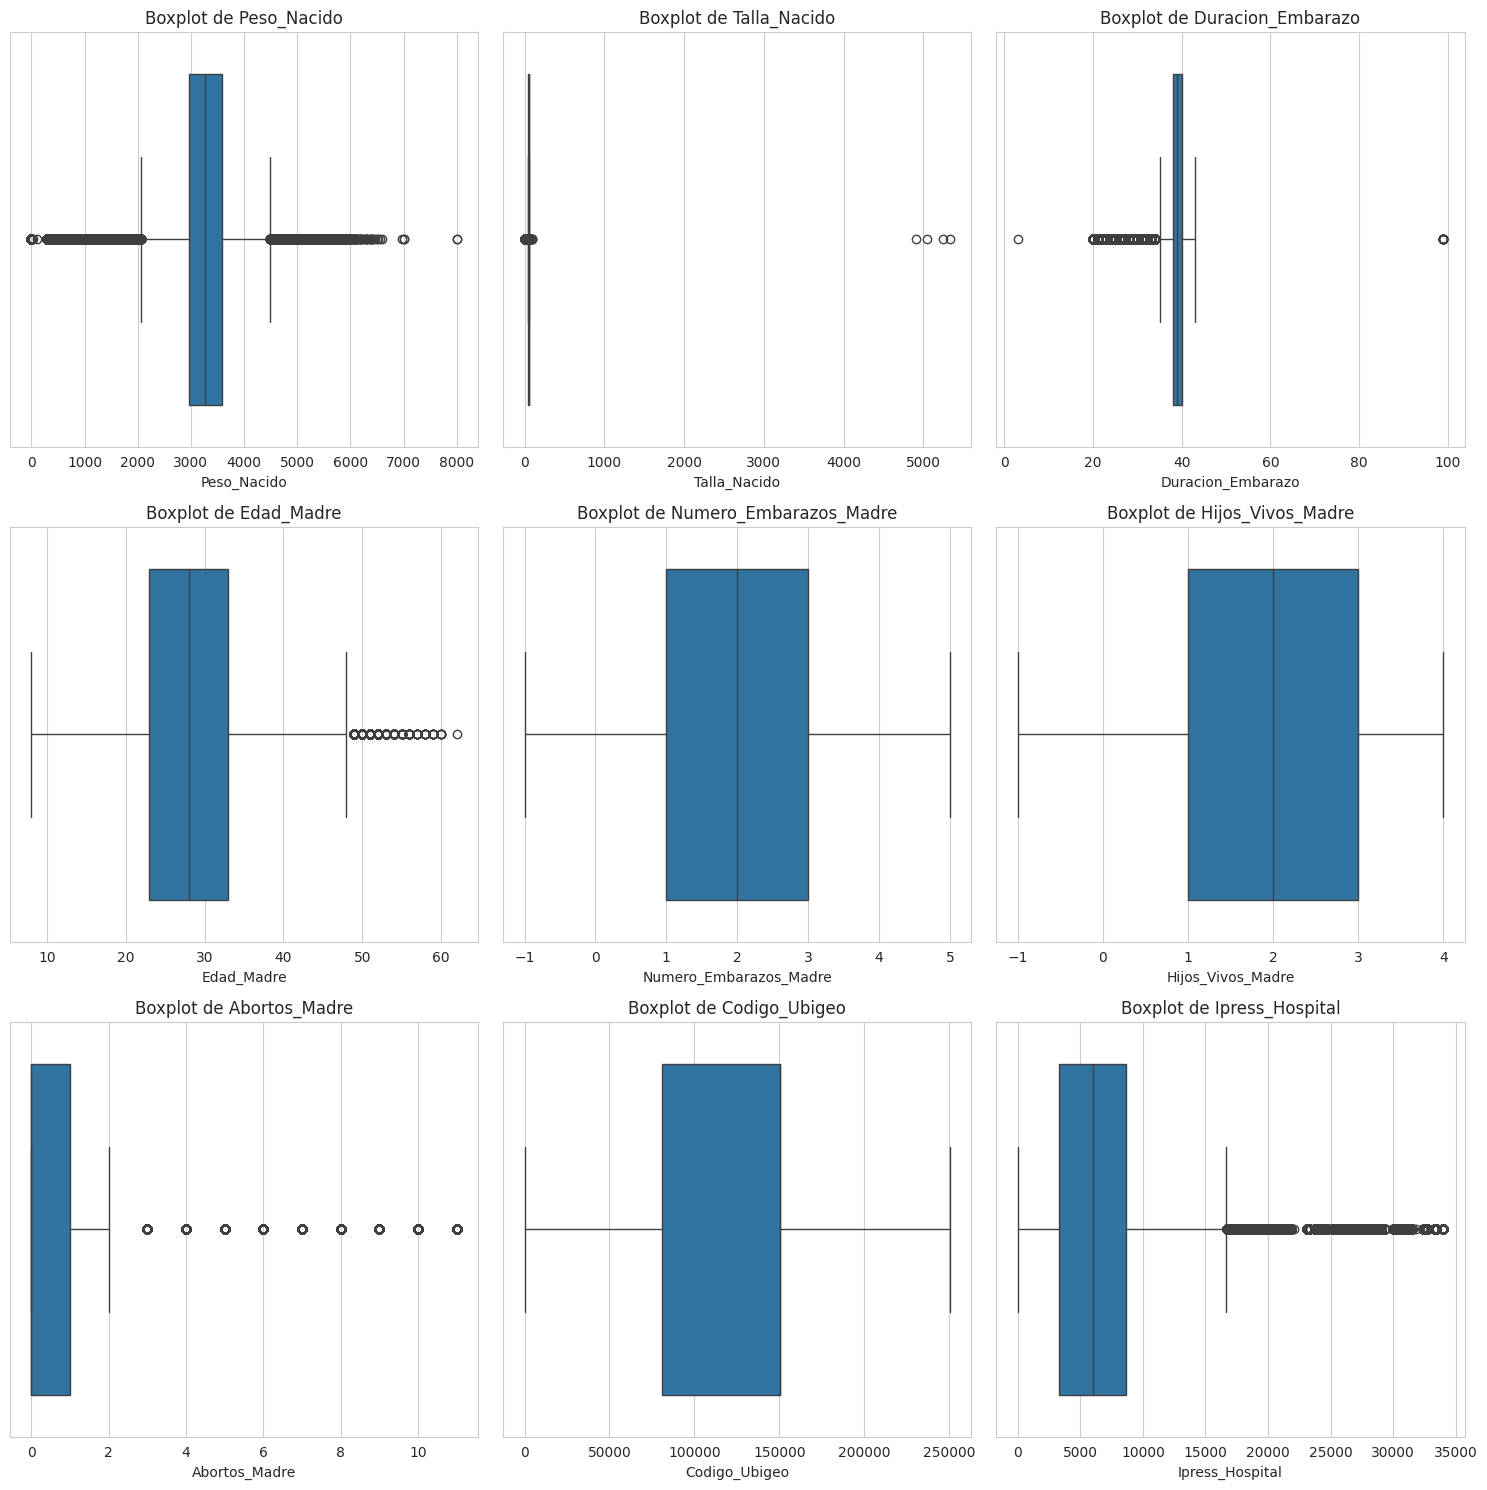

In [47]:
# Visualizar outliers con boxplot para todas las columnas numéricas
numeric_columns = df_nacimientos.select_dtypes(include=['float64', 'int64']).columns  # Filtrar solo columnas numéricas


# Calcular el número de filas y columnas necesarias para los subgráficos
num_columns = 3  # Número de columnas en la cuadrícula
num_rows = int(np.ceil(len(numeric_columns) / num_columns))  # Calcula el número de filas necesarias
# Crear un boxplot para cada columna numérica
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_columns, i+1)  # Ajusta el número de filas y columnas según el número de columnas
    sns.boxplot(x=df_nacimientos[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

Creo que el único a eliminarle outliers seria **talla nacido**

Otros datos a borrar serian todos los que tienen que ver con el neonato

In [ ]:
#POR DECIDIR
# Eliminar outliers en todas las columnas numéricas usando el IQR
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[col].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango intercuartílico

    # Definir los límites inferior y superior para detectar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los valores dentro del rango
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Verificar las primeras filas después de eliminar outliers
df.head()
#IMPORTANTE: Aún no lo ejecute pq tengo dudas con respecto columnas como edad_madre o abortos_madre

,Peso_Nacido,Talla_Nacido,Duracion_Embarazo,Condicion_Parto,Sexo_Nacido,Tipo_Parto,Edad_Madre,Estado_Civil_Madre,Nivel_Instruccion_Madre,Ocupacion_Madre,...,Hijos_Vivos_Madre,Hijos_Fallecidos_Madre,Abortos_Madre,Pais_Madre,Codigo_Ubigeo,Ipress_Hospital,Lugar_Nacimiento,Atiende_Parto,Financiador_Parto,Fecha_Nacimiento
1,3320,48.0,40,EUTOCICO,FEMENINO,UNICO,35,SOLTERO,PRIMARIA COMPLETA,AMA DE CASA,...,3,-1,0.0,PERU,130102,5220,ESTABLECIMIENTO DE SALUD,OBSTETRA,SIS,2021-01-01
2,3200,50.0,39,CESAREA,MASCULINO,UNICO,32,SOLTERO,PRIMARIA INCOMPLETA,AMA DE CASA,...,2,-1,2.0,PERU,120607,432,ESTABLECIMIENTO DE SALUD,MEDICO GINECO-OBSTETRA,SIS,2021-01-01
3,3850,51.0,39,EUTOCICO,MASCULINO,UNICO,34,SOLTERO,SECUNDARIA INCOMPLETA,AMA DE CASA,...,3,-1,1.0,PERU,130205,5269,ESTABLECIMIENTO DE SALUD,OBSTETRA,SIS,2020-10-01
4,3990,51.0,38,CESAREA,MASCULINO,UNICO,33,DIVORCIADO,SUPERIOR NO UNIV. COMPLETA,AMA DE CASA,...,3,-1,0.0,PERU,70101,10827,ESTABLECIMIENTO DE SALUD,MEDICO GINECO-OBSTETRA,PARTICULAR,2021-01-01
5,3440,49.0,38,EUTOCICO,MASCULINO,UNICO,20,SOLTERO,PRIMARIA COMPLETA,AMA DE CASA,...,2,-1,0.0,PERU,90206,3884,ESTABLECIMIENTO DE SALUD,OBSTETRA,SIS,2021-01-01


**Explicación:**

Boxplot: Los valores atípicos aparecerán como puntos fuera de los "bigotes" del boxplot. Esto te da una visión rápida de los posibles outliers en cada columna.

IQR (Rango Intercuartílico):

Calculamos los primeros (Q1) y terceros (Q3) cuartiles de la columna.

El IQR es la diferencia entre Q3 y Q1.

Los valores por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR son considerados outliers y son eliminados en el código.

## Normalización o Estandarización de datos



In [ ]:
from sklearn.preprocessing import StandardScaler

# Crear el objeto StandardScaler
#scaler = StandardScaler()

# Estandarizar las columnas numéricas del DataFrame
#df[['columna_numerica']] = scaler.fit_transform(df[['columna_numerica']])

# Verifica las primeras filas después de la estandarización
#df.head()
#Aclaraciones sobre el flujo
#Mal, mejor modular todo para poder aplicar todo el proceso de Preprocesamiento, limpieza y estandarización como una sola función o pipeline a cada conjunto de datos

KeyError: "None of [Index(['columna_numerica'], dtype='object')] are in the [columns]"

Estandarización es especialmente útil cuando los modelos pueden ser sensibles a la escala, como KNN y redes neuronales.

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

# Crear el objeto MinMaxScaler
#scaler = MinMaxScaler()

# Normalizar las columnas numéricas del DataFrame
#df[['columna_numerica']] = scaler.fit_transform(df[['columna_numerica']])

# Verifica las primeras filas después de la normalización
#df.head()

Normalización es útil si los modelos requieren que los datos estén en un rango específico, como 0 a 1.

## Conversión de variables categóricas a numéricas

En muchos modelos de machine learning, las variables categóricas deben ser convertidas a variables numéricas para que estos las puedan procesar correctamente.

One-Hot Encoding (para categorías sin orden implícito):

Para columnas como Sexo_Nacido, Estado_Civil_Madre, que tienen un orden natural.

In [ ]:
# Identificar columnas categóricas
#categorical_columns = df_nacimientos.select_dtypes(include=['object']).columns
# PELIGRO!!!!: Ahh hay columas object que estan raras entonces no se xdd tenemos que verlo
# Aplicar One-Hot Encoding a todas las columnas categóricas
#df_nacimientos = pd.get_dummies(df_nacimientos, columns=categorical_columns, drop_first=True)

# Verificar las primeras filas después del One-Hot Encoding
#df_nacimientos.head()

#drop_first=True elimina la primera columna de la codificación para evitar la multicolinealidad.

## Dividir los datos en conjunto de entrenamiento y prueba

:v

In [ ]:
#proximamente ya me dio flojera

# **IMPLEMENTACIÓN DE MODELOS PREDICTIVOS**

# **Consultas Iteligencia generativa**

## Prompt 1:
mi profesor nos dio este documento tambien, hizo enfasis en 1.13. Selección de características — documentación de scikit-learn 1.7.2

El **documento sobre la selección de características de scikit-learn** que te proporcionó tu profesor se enfoca en un aspecto crucial para mejorar la **precisión y eficiencia de los modelos predictivos**. La selección de características (feature selection) es un proceso importante cuando tienes muchas variables y deseas reducir la **dimensionalidad** del problema, eliminando aquellas que son irrelevantes o redundantes.

### **¿Qué es la Selección de Características?**

La **selección de características** es el proceso de identificar y seleccionar un subconjunto de características más relevantes de un conjunto de datos, lo cual ayuda a:

* Mejorar el rendimiento del modelo.
* Reducir el sobreajuste (overfitting).
* Reducir el tiempo de entrenamiento y de predicción.

### **Enfoques principales para la Selección de Características**:

1. **Métodos de Filtro (Filter Methods)**:

   * Evalúan las características de forma independiente usando estadísticas o métricas, sin considerar el modelo que se va a usar.
   * Ejemplos:

     * **Chi-cuadrado** (`chi2`)
     * **ANOVA F-value** (`f_classif`)
     * **Correlación** (entre características y la variable objetivo).

2. **Métodos de Envolvimiento (Wrapper Methods)**:

   * Utilizan un modelo predictivo para evaluar el desempeño de las características seleccionadas.
   * Ejemplo: **Selección recursiva de características (RFE)**, que entrena el modelo y elimina las características menos importantes de forma recursiva.

3. **Métodos Basados en la Importancia de los Modelos (Embedded Methods)**:

   * Se realizan durante el entrenamiento del modelo, ya que algunos modelos calculan la **importancia de las características**.
   * Ejemplo: **Árboles de decisión** (Decision Trees) o **Random Forests**.

---

### **Implementación de Selección de Características en scikit-learn**:

Si quieres usar la selección de características en **scikit-learn** para tu proyecto, puedes utilizar algunas de las herramientas que la documentación proporciona. A continuación te doy un ejemplo básico de cómo usar **`SelectKBest`**, que es un método de filtro para seleccionar las mejores características según una estadística.

### **Ejemplo básico con `SelectKBest`**:

```python
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Cargar un dataset de ejemplo (Iris)
data = load_iris()
X = data.data  # Características
y = data.target  # Objetivo

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seleccionar las 2 mejores características usando ANOVA F-value
selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X_train, y_train)

# Ver las características seleccionadas
print("Características seleccionadas:", selector.get_support())
print("Mejores características:", X_new[:5])

# Entrenar un modelo con las características seleccionadas
model = RandomForestClassifier()
model.fit(X_new, y_train)

# Evaluar en el conjunto de prueba
X_test_selected = selector.transform(X_test)
score = model.score(X_test_selected, y_test)
print("Precisión en el conjunto de prueba:", score)
```

### **Explicación**:

1. **`SelectKBest`**: Selecciona las **`k`** mejores características según el criterio que se elija. En este caso, se usa **ANOVA F-value** (`f_classif`), que es común para **clasificación**.
2. **`fit_transform`**: Ajusta el selector a los datos y selecciona las mejores características del conjunto de entrenamiento.
3. **Modelo**: Se entrena un **RandomForestClassifier** utilizando solo las características seleccionadas.

### **Otros métodos de selección en scikit-learn**:

* **`RFE` (Recursive Feature Elimination)**: Elimina recursivamente las características menos importantes.
* **`RFECV`**: Utiliza la validación cruzada para encontrar el número óptimo de características.

---

### **Próximos pasos para aplicar esto en tu trabajo**:

1. **Cargar y preparar tus datos**: Asegúrate de que las columnas estén en el formato correcto y de que hayas realizado un buen preprocesamiento.
2. **Seleccionar las mejores características**: Usa `SelectKBest` o `RFE` para identificar las características más relevantes para la predicción de la **tasa de natalidad**.
3. **Entrenar y evaluar tu modelo**: Con las características seleccionadas, entrena tu modelo y evalúa su desempeño.

---

Si necesitas más detalles sobre algún método de selección de características o ejemplos más específicos de cómo integrarlo en tu proyecto, ¡avísame y te ayudo!


## Prompt 2: Sobre el orden del flujo

¡Excelente pregunta\! Es uno de los puntos que más confunde al empezar.

La respuesta corta es: **ninguno va antes que el otro**. Esos dos procesos se hacen **en paralelo**, pero sobre **conjuntos de columnas diferentes**.

No puedes "normalizar" una variable categórica (como 'Lima') y no puedes hacer "encoding" de una variable ya numérica (como 'Edad\_Madre').

Piénsalo como lavar la ropa: no metes toda la ropa y luego le pones lejía (cloro) y después detergente. Separas la ropa:

  * **Ropa Blanca (Columnas Numéricas):** `Edad_Madre`, `Peso_Nacido`, etc.
  * **Ropa de Color (Columnas Categóricas):** `DEPARTAMENTO`, `Estado_Civil_Madre`, etc.

Luego, aplicas el proceso correcto a cada grupo por separado:

  * A la Ropa Blanca le pones **Estandarización / Normalización**.
  * A la Ropa de Color le pones **One-Hot Encoding**.

-----

### La Herramienta Correcta: `ColumnTransformer`

La herramienta de `scikit-learn` diseñada exactamente para esto es el `ColumnTransformer`, que (como usamos en el código anterior) se combina con `Pipeline`.

Así es como funciona el flujo lógico y el orden correcto:

#### 1\. Separa tus columnas por tipo

Primero, le dices a Python qué columnas son numéricas y cuáles son categóricas.

```python
# 🔢 Columnas NUMÉRICAS (para escalar)
numeric_features = ['Edad_Madre_Promedio', 'Peso_Promedio', 'Hijos_Vivos_Promedio']

# 🔠 Columnas CATEGÓRICAS (para hacer encoding)
categorical_features = ['DEPARTAMENTO', 'Nivel_Educativo_Moda', 'Trimestre']
```

#### 2\. Define un "pipeline" de reglas para cada tipo

  * **Reglas para Números:** 1. Rellena nulos (con mediana). 2. Normaliza (con `MinMaxScaler`).
  * **Reglas para Texto:** 1. Rellena nulos (con la moda). 2. Aplica `OneHotEncoder`.

<!-- end list -->

```python
# Pipeline para números
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Pipeline para categorías
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
```

#### 3\. Combínalos con `ColumnTransformer`

Aquí es donde ocurre la "magia". El `ColumnTransformer` aplica tus reglas a tus listas de columnas, todo al mismo tiempo (en paralelo).

```python
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Aplica 'numeric_transformer' a 'numeric_features'
        ('cat', categorical_transformer, categorical_features) # Aplica 'categorical_transformer' a 'categorical_features'
    ])
```

-----

### ¿Dónde va el `train_test_split` en todo esto?

Esta es la parte **más importante** del orden. La división de datos (train/test) se hace **SIEMPRE PRIMERO**, antes de cualquier preprocesamiento.

**¿Por qué?** Para evitar la **"fuga de datos" (data leakage)**.

No debes usar la mediana o el valor máximo de tus datos de prueba (`X_test`) para normalizar tus datos de entrenamiento (`X_train`). Tienes que "fingir" que tus datos de prueba no existen.

### El Flujo de Trabajo Correcto (El Orden Definitivo)

Este es el orden que debes seguir siempre:

1.  **División de Datos:** Separa tu `df_agregado` en `X_train`, `X_test`, `y_train`, `y_test`.
2.  **Definir Preprocesador:** Creas tu `ColumnTransformer` (como en el paso 3 de arriba).
3.  **Ajustar (Fit):** Ajustas el preprocesador **SOLO con los datos de entrenamiento**: `preprocessor.fit(X_train)`.
      * *Aquí es donde aprende la mediana de `X_train`, el máximo de `X_train`, las categorías de `X_train`, etc.*
4.  **Transformar (Transform):** Usas ese preprocesador ya "entrenado" para transformar **ambos** conjuntos de datos:
      * `X_train_procesado = preprocessor.transform(X_train)`
      * `X_test_procesado = preprocessor.transform(X_test)`
5.  **Entrenar Modelo:** Entrenas tu Random Forest usando `X_train_procesado` y `y_train`.
6.  **Evaluar Modelo:** Evalúas tu modelo usando `X_test_procesado` y `y_test`.